## Import Necessary Libraries

In [98]:
import pandas as pd
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras import models, layers
from keras_preprocessing.image import load_img, array_to_img, img_to_array, ImageDataGenerator
from tensorflow.keras.optimizers import  Adam
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Load the Files of Images

In [99]:
datagen = ImageDataGenerator()

In [100]:
train_path =  './data/fruits-360_dataset/fruits-360/Training'
test_path = './data/fruits-360_dataset/fruits-360/Test'
val_path = './data/fruits-360_dataset/fruits-360/Validation'

In [101]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, 
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [102]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (200, 200),
    batch_size = 32,
    color_mode = 'rgb',
    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (200, 200),
    batch_size = 32,
    color_mode = 'rgb',
    class_mode = 'categorical')

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size = (200, 200),
    batch_size = 32,
    color_mode = 'rgb',
    class_mode = 'categorical')

Found 4711 images belonging to 6 classes.
Found 1751 images belonging to 6 classes.
Found 523 images belonging to 6 classes.


In [103]:
train_class_names = list(train_generator.class_indices.keys())
train_class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red Delicious']

In [104]:
test_class_names = list(test_generator.class_indices.keys())
test_class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red Delicious']

In [105]:
val_class_names = list(val_generator.class_indices.keys())
val_class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red Delicious']

## Begin Modeling

#### Baseline Model

In [106]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [107]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

In [108]:
print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(32, 120000)
(32, 120000)
(32, 120000)


In [109]:
train_y = np.reshape(train_labels[:,0], (32,1))
test_y = np.reshape(test_labels[:,0], (32,1))
val_y = np.reshape(val_labels[:,0], (32,1))

In [110]:
np.random.seed(3)
baseline_model = models.Sequential()
baseline_model.add(layers.Dense(20, activation='relu', input_shape=(120000,))) # 2 hidden layers
baseline_model.add(layers.Dense(7, activation='relu'))
baseline_model.add(layers.Dense(5, activation='relu'))
baseline_model.add(layers.Dense(1, activation='sigmoid'))

In [111]:
baseline_model.compile(optimizer='sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

baseline_histoire = baseline_model.fit(train_img,
                    train_y,
                    epochs = 30,
                    batch_size = 32,
                    validation_data = (val_img, val_y))

Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.7500

2022-12-06 11:18:27.367151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-06 11:18:27.511491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 308ms/step - loss: 0.0000e+00 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 0.9688
Epoch 2/30
1/1 [==============================] - 0s 110ms/step - loss: 0.0000e+00 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 0.9688
Epoch 3/30
1/1 [==============================] - 0s 105ms/step - loss: 0.0000e+00 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 0.9688
Epoch 4/30
1/1 [==============================] - 0s 106ms/step - loss: 0.0000e+00 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 0.9688
Epoch 5/30
1/1 [==============================] - 0s 105ms/step - loss: 0.0000e+00 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 0.9688
Epoch 6/30
1/1 [==============================] - 0s 104ms/step - loss: 0.0000e+00 - accuracy: 0.7500 - val_loss: 0.0000e+00 - val_accuracy: 0.9688
Epoch 7/30
1/1 [==============================] - 0s 105ms/step - loss: 0.0000e+00 - accuracy: 0.7500 - val_loss: 0.0000e+0

In [112]:
baseline_results_train = baseline_model.evaluate(train_img, train_y)

1/1 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - accuracy: 0.7500


In [113]:
baseline_results_test = baseline_model.evaluate(test_img, test_y)

1/1 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [114]:
print(f'Baseline Train Results: {baseline_results_train}')
print(f'Baseline Test Results: {baseline_results_test}')

Baseline Train Results: [0.0, 0.75]
Baseline Test Results: [0.0, 1.0]


#### Baseline Model Visualizations

#### Graphing Accuracy and Loss Metrics

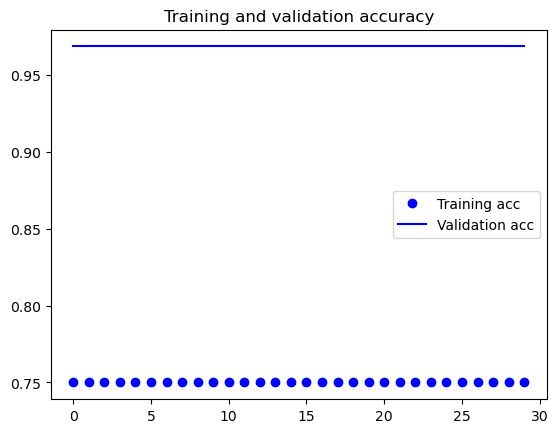

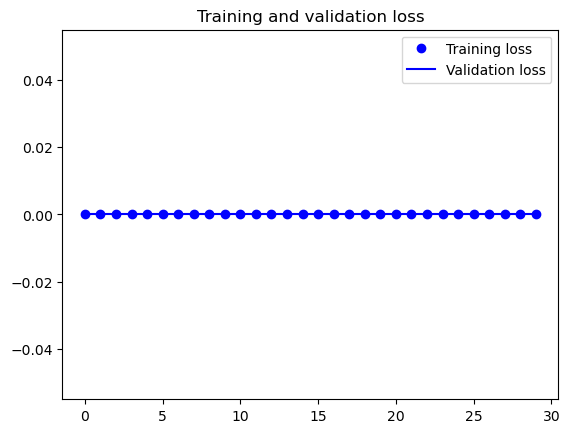

In [115]:
# Plot history
acc = baseline_histoire.history['accuracy']
val_acc = baseline_histoire.history['val_accuracy']
loss = baseline_histoire.history['loss']
val_loss = baseline_histoire.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


#### Second Model

In [116]:
# sz = 200

# # Initializing the CNN
# model1 = Sequential()

# # First convolution layer and pooling
# model1.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
# model1.add(MaxPooling2D(pool_size = (2, 2)))

# # Second convolution layer and pooling
# model1.add(Convolution2D(32, (3, 3), activation='relu'))
# # input_shape is going to be the pooled feature maps from the previous convolution layer
# model1.add(MaxPooling2D(pool_size=(2, 2)))

# # Flattening the layers
# model1.add(Flatten(input_shape = (28,28)))

# # Adding a fully connected layer
# model1.add(Dense(units=96, activation='relu'))
# model1.add(Dropout(0.40))
# model1.add(Dense(units=32, activation='relu'))
# model1.add(Dense(units=24, activation='softmax')) # softmax for more than 2

In [117]:
# model1.summary()

In [118]:
# model1.compile(optimizer='adam',
#                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#                metrics=['accuracy'])

In [119]:
# history = model1.fit(
#     train_generator,
#     validation_data = test_generator,
#     epochs = 5
# )